In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from sympy import latex
from IPython.display import Math
from matplobblib.tvims import rrstr

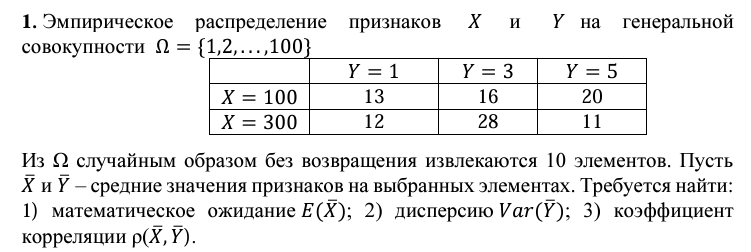

In [1]:
from matplobblib.tvims import rrstr
def SFFP_6(X,Y,n_XY,n):
    """Эмпирическое распределение признаков X и Y
    на генеральной совокупности Ω={1,2,...,100} задано таблицей частот.
    Из Ω случайным образом без возвращения извлекаются 6 элементов. Пусть X¯
    и Y¯ – средние значения признаков на выбранных элементах.
    Требуется найти:
    - математическое ожидание E(X¯)
    - дисперсию Var(Y¯)
    - коэффициент корреляции ρ(X¯,Y¯)

    Args:
        X (list): Все значения, которые принимает X
        Y (list): Все значения, которые принимает Y
        n_XY (list): Значения таблицы частот двумерным списком
        n (int): количество элементов, извлекаемых без возвращения
        
    ## Prints
        `answer` каждое значение по очереди.<br>C запятой вместо точки и сокращением до соответствующего количества знаков после запятой

    Returns:
        `answer` (tuple): Соответствующие величины
    """
    from IPython.display import Math
    import numpy as np
    
    X = np.array(X)
    Y = np.array(Y)
    n_XY = np.array(n_XY)
    N = n_XY.sum()

    N = n_XY.sum()                  # Всего элементов в генеральной совокупности
    p_X = n_XY.sum(axis=1) / N  # частоты для X
    p_Y = n_XY.sum(axis=0) / N  # частоты для Y

    E_X = (X * p_X).sum()
    E_Y = (Y * p_Y).sum()

    # Найдем дисперсии Var(X) и Var(Y)
    Var_X = ((X) ** 2 * p_X).sum()  - E_X**2
    Var_Y = ((Y) ** 2 * p_Y).sum()  - E_Y**2
    Var_Y=np.dot(np.power(Y, 2), p_Y) - E_Y**2

    # Найдем ковариацию Cov(X, Y)
    cov_XY = 0
    for i in range(len(X)):
        for j in range(len(Y)):
            p_xy = n_XY[i, j] / N
            cov_XY += p_xy * (X[i] - E_X) * (Y[j] - E_Y)

    # Дисперсии выборочных средних
      # размер выборки
    Var_X_bar = Var_X /n * (N-n)/(N-1)
    Var_Y_bar = Var_Y /n * (N-n)/(N-1)

    # Ковариация выборочных средних
    Cov_XY_bar = cov_XY /n * (N-n)/(N-1)

    # Коэффициент корреляции 
    rho_XY = cov_XY / np.sqrt(Var_X * Var_Y)
    
    answer = [E_X, Var_Y_bar,rho_XY ]

    display(Math(('Математическое ожидание \mathbb{E}(\overline{X}) = ' + f'{rrstr(answer[0],3)}').replace(' ','~')))
    display(Math(('Дисперсия \mathbb{Var}(\overline{Y}) = ' + f'{rrstr(answer[1],3)}').replace(' ','~')))
    display(Math(('Коэффициент корреляции r(\overline{X},\overline{Y}) = ' + f'{rrstr(answer[2],3)}').replace(' ','~')))

    return answer

X = [100,300]
Y = [1,3,5]
n_XY = [[13,16,20],[12,28,11]]

SFFP_6(X,Y,n_XY,10)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[202.0, 0.20232727272727272, -0.10888030903470766]

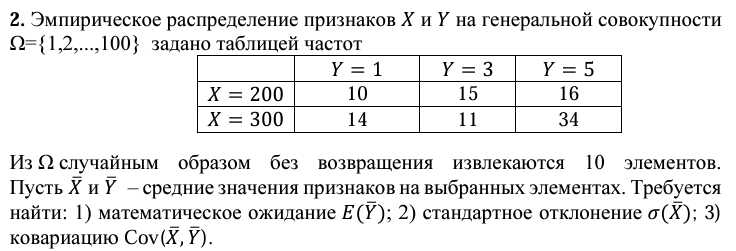

In [8]:
def SFFP_7(X,Y,n_XY,n):
    """Эмпирическое распределение признаков X и Y
    на генеральной совокупности Ω={1,2,...,100} задано таблицей частот.
    Из Ω случайным образом без возвращения извлекаются 6 элементов. Пусть X¯
    и Y¯ – средние значения признаков на выбранных элементах.
    Требуется найти:
    - математическое ожидание E(Y¯)
    - стандартное отклонение σ(X¯)
    - ковариацию Cov(X¯,Y¯)

    Args:
        X (list): Все значения, которые принимает X
        Y (list): Все значения, которые принимает Y
        n_XY (list): Значения таблицы частот двумерным списком
        n (int): количество элементов, извлекаемых без возвращения

    ## Prints
        `answer` каждое значение по очереди.<br>C запятой вместо точки и сокращением до соответствующего количества знаков после запятой

    Returns:
        `answer` (tuple): Соответствующие величины
    """
    from IPython.display import Math
    import numpy as np
    X = np.array(X)
    Y = np.array(Y)
    n_XY = np.array(n_XY)
    N = n_XY.sum()

    N = n_XY.sum()                  # Всего элементов в генеральной совокупности
    p_X = n_XY.sum(axis=1) / N  # частоты для X
    p_Y = n_XY.sum(axis=0) / N  # частоты для Y

    E_X = (X * p_X).sum()
    E_Y = (Y * p_Y).sum()

    # Найдем дисперсии Var(X) и Var(Y)
    Var_X = ((X - E_X) ** 2 * p_X).sum()
    Var_Y = ((Y - E_Y) ** 2 * p_Y).sum()

    # Найдем ковариацию Cov(X, Y)
    cov_XY = 0
    for i in range(len(X)):
        for j in range(len(Y)):
            p_xy = n_XY[i, j] / N
            cov_XY += p_xy * (X[i] - E_X) * (Y[j] - E_Y)

    # Дисперсии выборочных средних
    Var_X_bar = Var_X /n * (N-n)/(N-1)
    Var_Y_bar = Var_Y /n * (N-n)/(N-1)

    # Ковариация выборочных средних
    Cov_XY_bar = cov_XY /n * (N-n)/(N-1)

    # Коэффициент корреляции выборочных средних
    rho_XY_bar = Cov_XY_bar / (np.sqrt(Var_X_bar) * np.sqrt(Var_Y_bar))

    answer = [E_Y, Var_X_bar**0.5, Cov_XY_bar]
    
    display(Math(('Математическое ожидание \mathbb{E}(\overline{Y}) = ' + f'{rrstr(answer[0],3)}').replace(' ','~')))
    display(Math(('Стандартное отклонение \sigma(\overline{X}) = ' + f'{rrstr(answer[1],3)}').replace(' ','~')))
    display(Math(('Ковариация \mathbb{Cov}(\overline{X},\overline{Y}) = ' + f'{rrstr(answer[2],3)}').replace(' ','~')))

    return answer

X = [100,300]
Y = [1,2,4]
n_XY = [[21,17,12],[10,27,13]]
n = 6

SFFP_7(X,Y,n_XY,n)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[2.19, 39.78054276265701, 2.057239057239058]

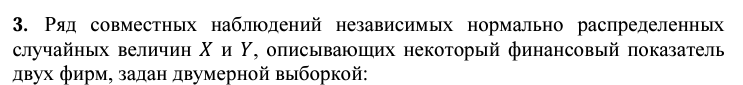<br>
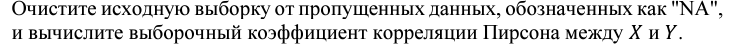

In [5]:
import re
import pandas as pd
data = """{(-214.4, -196.1222); (-256.9, -175.173); (-202.3, NA); (-239.3, -208.7948);  (-287.3, -238.7711); (-196.5, -274.856); (-224, -278.7524); (-240.2, -229.0939);  (-231.9, -237.8394); (-179.2, -208.9465); (NA, -186.388); (-258.8, NA);  (-237.8, -278.6498); (-273.5, -220.0173); (-206, -217.5404); (NA, NA);  (-227, -204.1577); (-241.6, -240.6529); (-234.6, NA); (-235.2, -266.0953);  (-202.4, -221.0894); (-183.1, -206.8865); (-220, -274.9425); (-208.2, -232.9762); (NA, -211.8263); (-245.4, -240.4984); (-254.2, -230.6192); (-216.6, -260.0378);  (-221.7, NA); (-192.8, -242.5521); (-229.3, NA); (-212.9, -216.6312); (-230.5, NA); (-220.7, -231.6356); (-201.2, NA); (-220.6, -270.0291); (-237.4, -222.8705);  (-248.9, -282.398); (-249.5, -168.73); (-196.7, -243.2915); (-241.7, -228.9693);  (-254.8, -243.7941); (-217, -169.2123); (-209.8, -186.8498); (-279, -266.3833); (NA, NA); (-197.2, -201.7408); (NA, -235.5852); (-202.5, -252.863);  (-273.1, -220.8998); (-220.5, -239.6719); (-252.8, -272.5675); (-235.4, -218.1677); (-206.6, -190.3638); (-213.1, -252.4642); (-207.9, -229.7951); (-272.4, -187.7126); (-224.2, -224.0721); (-169.8, -231.0987); (-216.3, -187.6854); (-250, -243.1863);  (-227.2, -212.2725); (-229.2, -258.8585); (-251.3, -247.0714); (-236.6, -227.2609); (-232.5, -195.074); (-234.7, -281.0113); (-240.6, -235.828); (-245.5, -217.1208);  (-223.4, -204.1562); (-236.2, -199.0068); (NA, -202.9738); (-254.3, NA);  (-259.1, -227.7556); (-279, NA); (-224.2, -231.7992); (-201.4, NA);  (-244.3, -239.6067); (-179.6, -216.5177); (-165.3, -263.392); (-229.9, -204.9858);  (-246.4, -172.9445); (-202.1, -196.6104); (-231.7, -210.8363); (NA, -222.951);  (-209.2, NA); (-200.1, -198.9821); (-232.9, -237.748); (-229.6, -254.527);  (-219.1, -252.8629); (-201.5, -252.3746); (-229.8, -235.0515); (-248.5, -214.7245); (-182.7, -241.9679); (-236.3, -185.3818); (-285.3, -241.1946); (-262.6, -259.8436); (-213.6, -207.5926); (-201, -267.2625); (-224.3, -247.7756); (NA, -185.1585);  (-226.7, -264.6949); (-216.4, -295.7108); (-190, -202.274); (-265.5, -246.4795);  (-213, -260.683); (-232.3, -246.545); (-217.2, -263.4495); (-199.2, -230.0708);  (-208.6, -268.45); (-201.2, -214.3047); (-262.2, -212.7205); (-188.2, -274.0026);  (-155.2, -270.0219); (-288, -219.8755); (-226.4, -248.257); (-252.9, -234.2434);  (-238.5, NA); (-226.2, -223.539); (-160.6, -254.5109); (-243.6, -237.9364);  (-219.6, -196.5018); (-208.3, -224.02); (-218.6, -261.5601); (-228.3, -238.0651);  (-263, -227.8186); (-265, -194.2366); (-206.4, -240.3734); (-239.6, -226.9095); (NA, -218.4492); (-227.2, -236.1292); (-232.9, -266.8274); (-242.1, -218.763);  (-217.3, -317.6571); (NA, -213.1899); (-213.3, -239.8124); (-266.6, -233.759);  (-237.4, -244.3302); (-313.6, -246.9523); (-250.8, -215.8164); (-210.3, -258.3312); (-250.9, -210.9057); (-240.6, -230.8002); (-242.8, -274.1018); (-235.2, -234.8576); (-291.4, -244.8539); (NA, NA); (-207, -229.9618); (-206.7, NA); (-152.7, NA)}"""
# Регулярное выражение для поиска пар (число или NA, число или NA)
pattern = r"\(([^,]+),\s*([^)]+)\)"

# Используем регулярное выражение, чтобы найти все пары значений
matches = re.findall(pattern, data)
cleaned_data = [(float(x) if x != 'NA' else None, float(y) if y != 'NA' else None) for x, y in matches]

# Создаем DataFrame
df = pd.DataFrame(cleaned_data, columns=['X', 'Y'])

df = df.dropna()
display(Math(('Выборочный коэффициент корреляции Пирсона между X и Y равен = ' + f'{df.corr("pearson").iloc[0,1]}').replace(' ','~')))

<IPython.core.display.Math object>

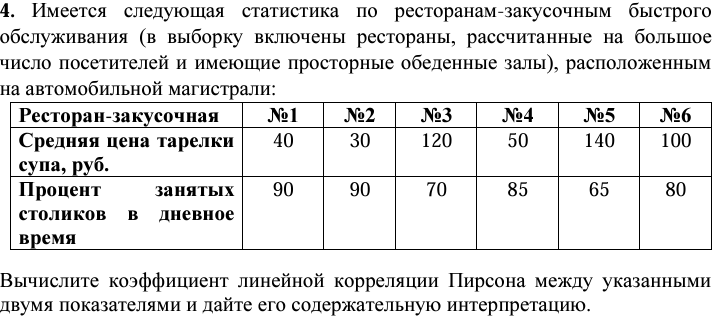

In [6]:
def corr_type(r)->str:
        
        ans=''
        if r > 0:
            ans += 'ПРЯМАЯ '
        elif r < 0:
                ans += 'ОБРАТНАЯ '
                
        if abs(r) == 0:
                ans += 'НЕ НАБЛЮДАЕТСЯ '
        elif abs(r) < 0.3:
                ans += 'ОЧЕНЬ СЛАБАЯ '
        elif 0.3 <= abs(r) < 0.5:
                ans += 'СЛАБАЯ'
        elif 0.5 <= abs(r) < 0.7:
                ans += 'УМЕРЕННАЯ '
        elif 0.7 <= abs(r) < 1:
                ans += 'СИЛЬНАЯ '
        else:
                ans += 'ФУНКЦИОНАЛЬНАЯ '
        return ans

X = [40,30,120,50,140,100]
Y = [90,90,70,85,65,80]

corr = pd.DataFrame((X,Y)).T.corr('pearson').iloc[0,1]

display(Math(('Выборочный коэффициент корреляции Пирсона между X и Y равен = ' + f'{corr}.' + f' Вид связи - {corr_type(corr)}').replace(' ','~')))

<IPython.core.display.Math object>

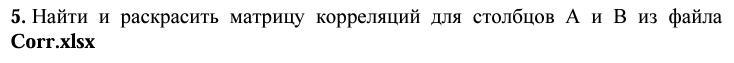

<IPython.core.display.Math object>

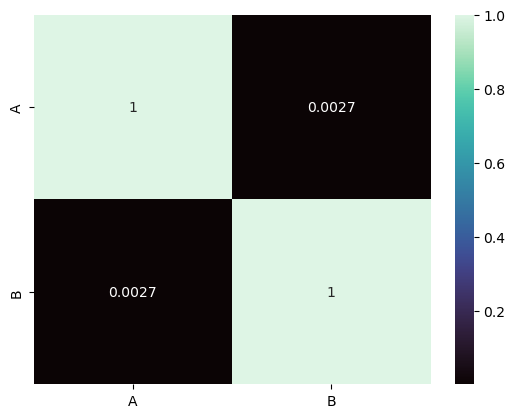

<IPython.core.display.Math object>

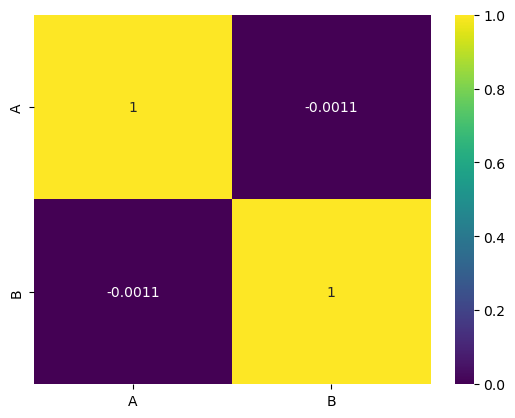

<IPython.core.display.Math object>

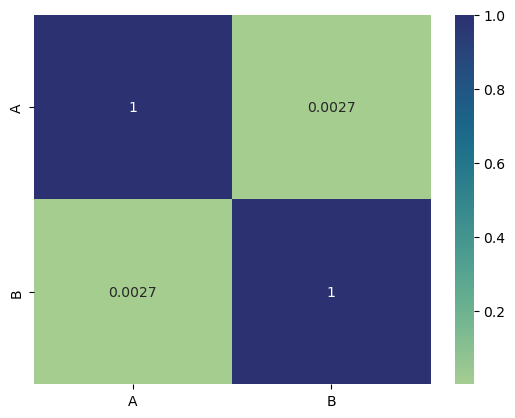

<IPython.core.display.Math object>

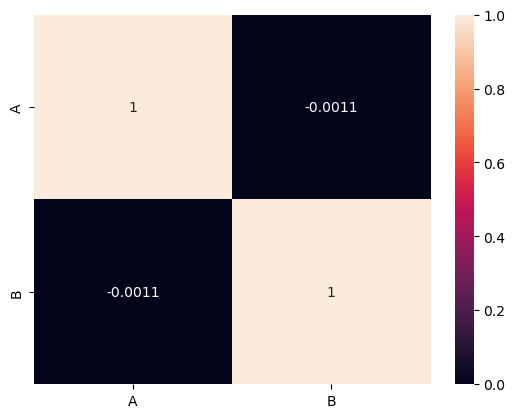

In [32]:
display(Math("лист = Данные".replace(' ','~')))
sns.heatmap(pd.read_excel('Corr.xlsx')[['A','B']].corr(), annot=True, cmap='mako')
plt.show()
display(Math("лист = Лист1".replace(' ','~')))
sns.heatmap(pd.read_excel('Corr.xlsx','Лист1')[['A','B']].corr(), annot=True, cmap='viridis')
plt.show()
display(Math("лист = Данные, NA очищены".replace(' ','~')))
sns.heatmap(pd.read_excel('Corr.xlsx')[['A','B']].dropna().corr(), annot=True, cmap='crest')
plt.show()
display(Math("лист = Лист1, NA очищены".replace(' ','~')))
sns.heatmap(pd.read_excel('Corr.xlsx','Лист1')[['A','B']].dropna().corr(), annot=True, cmap='rocket')
plt.show()